In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 1000)

In [2]:
def get_dataframe(name):
    
    file_name = f'Output/{name}.csv'
    return pd.read_csv(file_name)
dataset = get_dataframe('State-District age group ratio')

In [3]:
def plot_cluster(districts):
    df = dataset[dataset['District'].isin(districts)].iloc[:,:10]   # all rows and columns of age group 10-70 
    fig, ax = plt.subplots(figsize=(12, 8))
    age_distribution = [f'{i}-{i+9}' for i in range(1, 80, 10)]
    age_distribution.append('80 or more')
    
    def find_k():
        score_lst = []
        K = range(2, 12)
        for k in K:
            kmeans = KMeans(n_clusters=k)
            y = kmeans.fit(df.iloc[:, 3:])
            score = kmeans.inertia_
            score_lst.append(score)
            
        plt.plot(K, score_lst)
        plt.xlabel('Number of cluster')
        plt.ylabel('Inertia')
        plt.title('Elbow Method')
        plt.show()
    
    def cluster():
        kmeans = KMeans(n_clusters=5)
        y = kmeans.fit_predict(df.iloc[:, 3:])
        df['cluster'] = y
        
    def plot_scatter():
        plt.subplots(figsize=(12, 8))
        fig.canvas.draw()
        df1 = df[df.cluster==0]
        df2 = df[df.cluster==1]
        df3 = df[df.cluster==2]
        df4 = df[df.cluster==3]
        df5 = df[df.cluster==4]
    
        clusters = [df1, df2, df3, df4, df5]
        
        for cluster in clusters:
            y_axis = cluster.iloc[:, 2:11]
            plt.scatter([range(9)]*y_axis.shape[0], y_axis, label='Ratio of male:female for every age group')
        
        plt.xticks(range(9), age_distribution)

        plt.xlabel('Age group')
        plt.ylabel('Ratio Male:Female')
        plt.ylim(0,15) 
        plt.legend()
        plt.show()
        
    find_k()
    cluster()
    plot_scatter()

    display(df)


### Clustering the district using male to female ratio for every age group

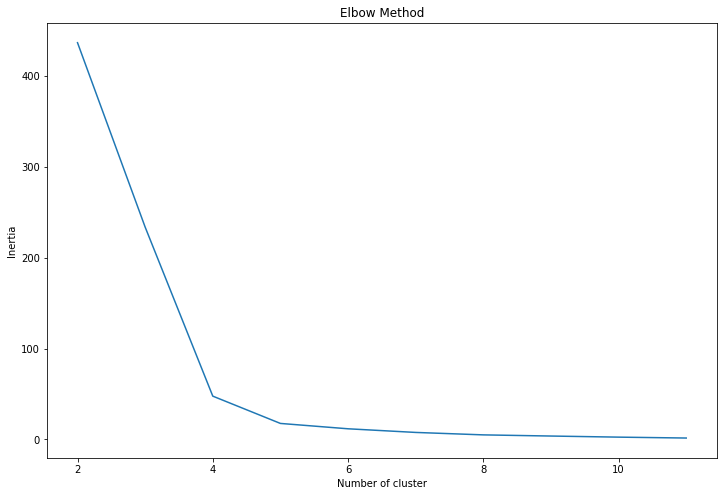

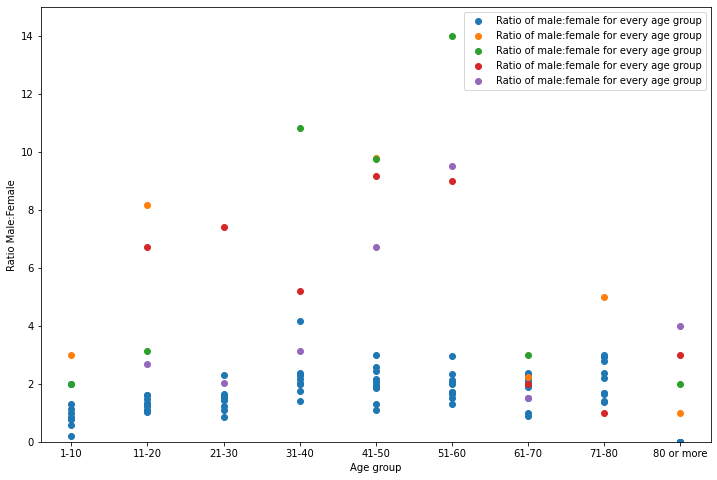

,State,District,Age (1-10),Age (11-20),Age (21-30),Age (31-40),Age (41-50),Age (51-60),Age (61-70),Age (71-80),cluster
169,Tamil Nadu,Chengalpattu,0.200000,1.321429,1.082569,2.318182,1.882353,1.297872,2.318182,1.666667,0
183,Tamil Nadu,Tiruvannamalai,1.000000,1.600000,0.844444,1.394737,1.315789,2.000000,0.900000,3.000000,0
187,Tamil Nadu,Thiruvallur,-1.000000,1.055556,1.512195,4.181818,1.109091,2.064516,1.526316,1.375000,0
189,Tamil Nadu,Cuddalore,-1.000000,2.666667,2.043478,3.125000,6.714286,9.500000,1.500000,-1.000000,4
232,Karnataka,Kalaburagi,0.842105,1.040462,1.227723,1.994681,2.165289,1.732759,2.163934,2.800000,0
235,Karnataka,Mysuru,0.777778,1.478261,1.654545,2.364407,1.960938,2.333333,2.092105,2.928571,0
236,Karnataka,Dharwad,0.583333,1.608696,1.438202,1.738889,2.058394,1.637795,1.967033,1.673913,0
237,Karnataka,Uttara Kannada,0.777778,1.088235,1.454545,2.150000,1.848485,1.500000,1.000000,2.214286,0
239,Karnataka,Udupi,1.125000,1.250000,1.487805,2.005181,3.008547,2.134146,2.367347,1.423077,0
241,Karnataka,Dakshina Kannada,2.000000,1.258824,1.584239,2.029787,2.583851,2.970588,1.882353,2.387755,0


In [4]:
districts = [
        'Chengalpattu', 'Thiruvallur', 'Cuddalore', 'Tiruvannamalai',  # Tamil Nadu
        'Kalaburagi', 'Mysuru', 'Dharwad', 'Uttara Kannada', 'Dakshina Kannada', 'Ballari', 'Udupi', 'Bidar'  # Karnataka
        'Patna', 'Bhagalpur', 'Madhubani', 'Katihar'  # Bihar
            ]

plot_cluster(districts)